1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [10]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

There are 8 local minima
Local minimum: [-1.70361  0.79608]; Value:   -0.215
Local minimum: [-1.60711 -0.56865]; Value:   2.104
Local minimum: [-1.6071  -0.56865]; Value:   2.104
Local minimum: [-0.08984  0.71266]; Value:   -1.032
Local minimum: [ 0.08984 -0.71266]; Value:   -1.032
Local minimum: [1.6071  0.56865]; Value:   2.104
Local minimum: [1.60711 0.56865]; Value:   2.104
Local minimum: [ 1.70361 -0.79608]; Value:   -0.215
Global minimum:  -1.03163


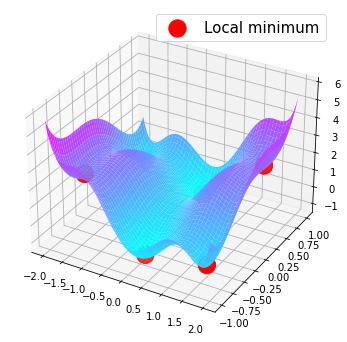

In [69]:
def f(params):
    x,y = params
    return (4. - 2.1*x**2 + (x**4)/3 )*(x**2) + x*y + (4*y**2 - 4)*(y**2)


X = np.linspace(-2, 2, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X,Y,f([X,Y]), cmap='cool')


X = np.linspace(-2, 2, 20)
Y = np.linspace(-1, 1, 20)

local_minimas = []
values_minima = []
for x in X:
    for y in Y:
        minima = optimize.minimize(f, [x,y]).x
        local_minimas.append(np.around(minima, decimals=5))
        values_minima.append(np.around(f(minima), decimals=5))

        
local_minimas, idx = np.unique(np.array(local_minimas), axis=0, return_index=True)
values_minima = np.array(values_minima)[idx]


print('There are {} local minima'.format(len(local_minimas)))


for xy, value in zip(local_minimas, values_minima):
    print('Local minimum: {}; Value:   {:.3f}'.format(xy, value))
        

ax.scatter3D(local_minimas[:,0], local_minimas[:,1], values_minima,s=300, c='r', label='Local minimum')
plt.legend(fontsize=15)
print('Global minimum: ',min(values_minima))



2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [88]:
from scipy.interpolate import interp1d

Text(0.5, 1.0, 'Alaska Max/Min Temperatures throughout a year')

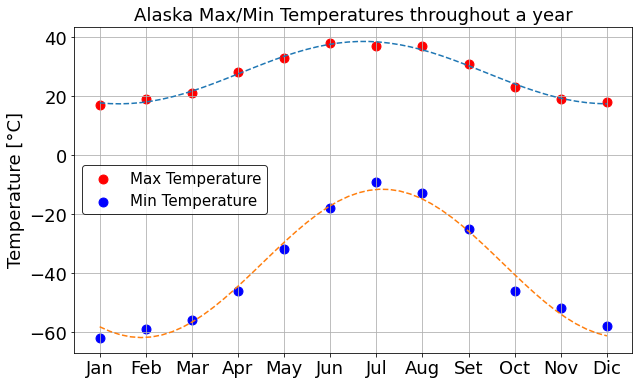

In [109]:
temps_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temps_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(1,13,1)
label_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug', 'Set', 'Oct', 'Nov', 'Dic']


#plot
fig = plt.figure(figsize=(10,6))
plt.scatter(months,temps_max,c='r', s=80, label='Max Temperature')
plt.scatter(months,temps_min, c='b', s=80, label='Min Temperature')
plt.grid(True)

plt.ylabel('Temperature [°C]', fontsize=18)
plt.xticks(ticks=months, labels=label_months, fontsize=18)
plt.yticks(fontsize=18)
legend = plt.legend(fontsize=15, frameon=1)
frame = legend.get_frame()
frame.set_edgecolor('black')


#fit

def f_guess(x, A,B, Phi, C):
    return A*np.sin(B*x + Phi) + C

#fit max temps
params_init = [50,1.,1., 20.]
popt_max, pcov_max = optimize.curve_fit(f_guess, months, temps_max, p0=params_init)
times = np.linspace(1,12,50)
plt.plot(times, f_guess(times, popt_max[0],popt_max[1],popt_max[2], popt_max[3] ), linestyle='dashed')


#fit min temps
params_init = [-30,1.,1., -20.]
popt_min, pcov_min = optimize.curve_fit(f_guess, months, temps_min, p0=params_init)

times = np.linspace(1,12,50)
plt.plot(times, f_guess(times, popt_min[0],popt_min[1],popt_min[2], popt_min[3] ), linestyle='dashed')

plt.title('Alaska Max/Min Temperatures throughout a year', fontsize=18)


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [338]:
import matplotlib

In [171]:
import pandas as pd
from scipy.stats import norm

p_val :  0.0
Chi² :  0.4935172078878458
The test is highly significative so we can reject the null hypothesis


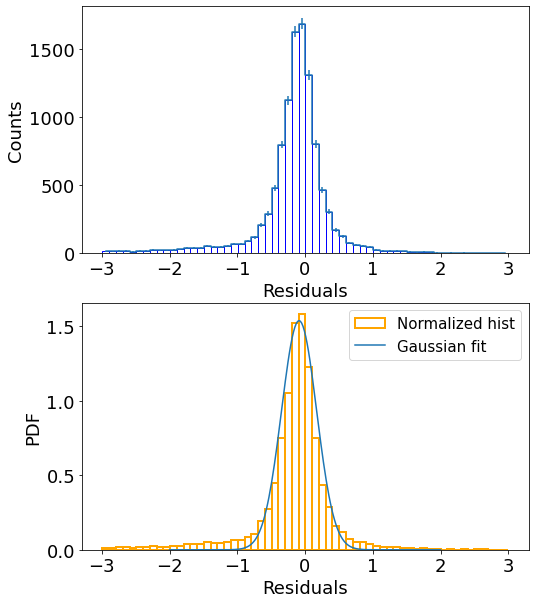

In [386]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P ./data/

df = pd.DataFrame(pd.read_pickle('./data/residuals_261.pkl').item())

#filtering
df = df[df['residuals']>-3]
df = df[df['residuals']<3]

Nbins = 60
#plot 1
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,10))


hist = ax[0].hist((df['residuals']), bins=Nbins, color='white', edgecolor='blue')
y = hist[0]
bin_edges = hist[1]
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])


ax[0].errorbar(bin_centers, y, yerr = y**0.5, drawstyle = 'steps-mid')

#adjunsting ax0
ax[0].tick_params(axis='x', labelsize=18)
ax[0].tick_params(axis='y', labelsize=18)
ax[0].set_xlabel('Residuals', fontsize=18)
ax[0].set_ylabel('Counts', fontsize=18)



#fit
def f_gauss(x, mean, std):
    return norm.pdf(x, mean, std)

hist2 = ax[1].hist((df['residuals']), bins=Nbins, color='white', edgecolor='orange',label='Normalized hist', density=True, linewidth=2)
y = hist2[0]


popt, pcov = optimize.curve_fit(f_gauss, bin_centers, y, p0=[0.,0.5])

#plot 2
x = np.linspace(-2,2, 200)
y_fit = norm.pdf(x, popt[0], popt[1])
ax[1].plot(x, y_fit, label='Gaussian fit')

#adjunsting ax1
ax[1].tick_params(axis='x', labelsize=18)
ax[1].tick_params(axis='y', labelsize=18)
ax[1].set_xlabel('Residuals', fontsize=18)
ax[1].set_ylabel('PDF', fontsize=18)
ax[1].legend(fontsize=15)


chi2 = np.sum((y-norm.pdf(bin_centers,popt[0], popt[1]))**2 / y**0.5)

pvalue = 1. - stats.chi2.cdf(chi2, 2)
print('p_val : ', p_val)
print('Chi² : ', chi2)

print('The test is highly significative so we can reject the null hypothesis')




4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

Best fit values
a: -9.988
b: 12.333
c: 9.384
Overall average temperature between 2008 and 2012: 9.384
Coolest daily average temperature of the year:  -0.604
Coolest daily average temperature of the year:  19.3722


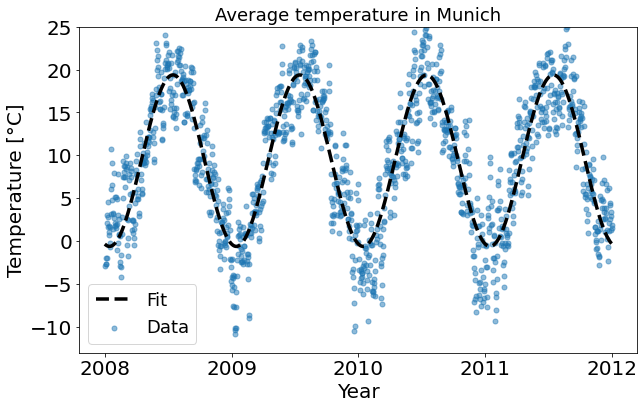

In [328]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P ./data/

def f(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

munich_tmp = pd.read_csv('./data/munich_temperatures_average_with_bad_data.txt', sep=' ', names = ['time', 'avg_temp'])

#filtering
munich_tmp = munich_tmp[munich_tmp['time'] > 2008]
munich_tmp = munich_tmp[munich_tmp['time'] < 2012]

#fit 1
init_guess = [1.,1.,1.]
popt, pcov = optimize.curve_fit(f, munich_tmp.time, munich_tmp.avg_temp)

#saving prediction 1
munich_tmp['fit1_pred'] = munich_tmp['time'].apply(lambda x: f(x, popt[0], popt[1], popt[2]))


#plot fit 1 vs data
x = np.linspace(2008, 2012, 2000)
y_fit = f(x, popt[0], popt[1], popt[2])
fig = plt.figure(figsize=(10,6))
plt.plot(x, y_fit, color='black', linewidth=3.5, linestyle='dashed', label='Fit')

plt.scatter(munich_tmp.time, munich_tmp.avg_temp, marker='.', s=100,alpha=0.5, label='Data')

#adjusting plot
plt.ylim(-13, 25)
plt.yticks(fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(ticks=np.arange(2008,2013,1),fontsize=20)
plt.ylabel('Temperature [°C]', fontsize=20)
plt.legend(fontsize=18)
plt.title('Average temperature in Munich', fontsize=18)

#print stuff for questions
print('Best fit values')
print('a: {:.3f}'.format(popt[0]))
print('b: {:.3f}'.format(popt[1]))
print('c: {:.3f}'.format(popt[2]))

print('Overall average temperature between 2008 and 2012: {:.3f}'.format(munich_tmp['avg_temp'].mean()))

print('Coolest daily average temperature of the year: ', min(np.around(y_fit, decimals=4)))
print('Coolest daily average temperature of the year: ', max(np.around(y_fit, decimals=4)))

#what's the meaning of the parameter b?
#it's just a translation over the x axis
#what physical sense does it have?
#none


#fit 2
def g(t, a, b, c, d):
    return a * np.cos(2*b*np.pi*t + c) + d


init_guess = [1.,1.,1.,1.]
popt, pcov = optimize.curve_fit(g, munich_tmp.time, munich_tmp.avg_temp)

#saving predictions 2
munich_tmp['fit2_pred'] = munich_tmp['time'].apply(lambda x: g(x, popt[0], popt[1], popt[2], popt[3]))


In [322]:
from scipy import stats

In [323]:
#adding RSS for both fits to dataframe
munich_tmp['RSS_fit1'] = (munich_tmp.avg_temp - munich_tmp.fit1_pred)**2
munich_tmp['RSS_fit2'] = (munich_tmp.avg_temp - munich_tmp.fit2_pred)**2


def Ftest(rss1, rss2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((rss1 - rss2)/(ndof_2 - ndof_1)) / (rss2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


rss1 = munich_tmp['RSS_fit1'].sum()
rss2 = munich_tmp['RSS_fit2'].sum()
print('RSS: ', rss1, rss2)
Ftest(rss1, rss2, 2,3,munich_tmp.shape[0], verbose=True)

RSS:  34359.85859996652 34352.79405370932
CL: 0.584 , additional parameter necessary: NO


0.5840708129110819

In [324]:
munich_tmp['date'] = pd.date_range(start='01/01/2008', end='12/31/2011', freq='D')


In [325]:
munich_tmp

,time,avg_temp,fit1_pred,fit2_pred,RSS_fit1,RSS_fit2,date
4748,2008.00274,-2.94444,-0.371638,-0.310372,6.619309,6.938313,2008-01-01
4749,2008.00548,-2.66667,-0.407067,-0.348951,5.105806,5.371823,2008-01-02
4750,2008.00821,-2.66667,-0.439480,-0.384507,4.960374,5.208268,2008-01-03
4751,2008.01095,-2.00000,-0.469106,-0.417291,2.343636,2.504967,2008-01-04
4752,2008.01369,-1.94444,-0.495812,-0.447158,2.098524,2.241854,2008-01-05
...,...,...,...,...,...,...,...
6204,2011.98836,3.44444,-0.138575,-0.170386,12.837995,13.066965,2011-12-27
6205,2011.99110,1.27778,-0.189041,-0.217992,2.151565,2.237333,2011-12-28
6206,2011.99384,2.88889,-0.236671,-0.262739,9.769129,9.932768,2011-12-29
6207,2011.99658,1.83333,-0.281448,-0.304616,4.472287,4.570812,2011-12-30
